In [0]:
import torch 
from torchvision import transforms, datasets
import torchvision

In [2]:

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


### Load data from the dataset

In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=True)

### Batch_size: the number of samles which the neural network will get in one run (usually from 8 to 64, regardless to the memory size of the PC)

### Shuffle: we need to show to the neural network a variety of data in order to don't have the unexpected result

In [4]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In the data variable there is 2 tensors:

1) for the image (there are 10 images in batch, so if we want to show first image, we should get access to data[0][0]: 0 - for 1 tensor, and 0 in the tensor)

2) for the actual true numbers, so if we want to show first true value correspondent to data[0][0], we need to get access to data[1][0]: 1 - for the 2nd tensor, 0 - in the tensor

In [5]:
x, y = data[0][0], data[1][0]
print(y)



tensor(6)


In [0]:
import matplotlib.pyplot as plt


In [7]:
data[0][0].shape

torch.Size([1, 28, 28])

The shape of the data[0][0] is not convienient one, it has 1 in the first dimension for torch manipulations, therefore we need to squeeze data or use view parameter

In [8]:
data[0][0].squeeze().shape

torch.Size([28, 28])

In [9]:
data[0][0].view(28,28).shape

torch.Size([28, 28])

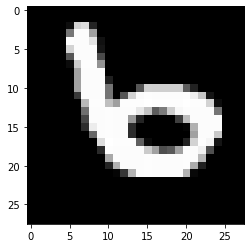

In [10]:
plt.imshow(data[0][0].squeeze(), cmap='gray')

### We need to be sure that our data is totally ballanced, so we will check how many samles for each number we have in dataset

In [11]:
total = 0
counter_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0 , 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [12]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


#### So the data is pretty balanced, we don't need to change something

## Let's create neural network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):

  def __init__(self):
    # launching the inicialization of parent class nn.Module in next line
    super().__init__()

    # definition of the fully conected layers (fc)
    self.fc1 = nn.Linear(28*28, 64)
    # input for the first layer is the flatten image and output can be any number but we stay with 64
    # next layer has to take output number from the previous layer, so in our case it's 64. Let's leave 64 for output as well
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    # fo the last layer we have 64 as input but in the result we expect 10 classes (because we have 10 numbers: 0 1 2 3 4 5 6 7 8 9 10)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    # relu - it's an activation function which is has to be in order to magnitude the output from layers in right way (apply the sigmoid function
    # and return the result in range from 0 to 1)
    x = F.relu(self.fc2(x))

    # here in forward method we can put some logic with operator if (if we need it)

    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

net = Net()
net


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
X = torch.rand((28, 28))
X = X.view(-1,28*28)
#  -1 in view method is the hint to the pytorch to fill this dimension by itself, for us it doesn't matter, what is the number is there

In [0]:
output = net(X)

In [17]:
output

tensor([[-2.3015, -2.2633, -2.3938, -2.3601, -2.2465, -2.2991, -2.2198, -2.3410,
         -2.2766, -2.3375]], grad_fn=<LogSoftmaxBackward>)

In [18]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

# number of passes through the whole of dataset
EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of featuresets and labels
    X, y = data
    # we need to set the gradients to zero because through passing the batches they accumulating
    net.zero_grad()
    output = net(X.view(-1, 28*28))

    # our true value is a scalar, therefore, we can't use just MSE, instead of it we will use nll_loss
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

  print(loss)



tensor(0.0543, grad_fn=<NllLossBackward>)
tensor(0.3050, grad_fn=<NllLossBackward>)
tensor(0.0101, grad_fn=<NllLossBackward>)


In [19]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.974


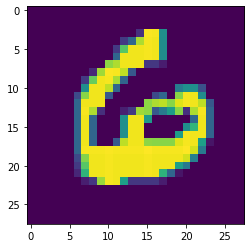

In [20]:
plt.imshow(X[0].view(28,28))
plt.show()

In [21]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(6, grad_fn=<NotImplemented>)


# Introduction to the Convolution networks


---



Convolution networks are used usually for image tasks but recently CNN outperform recurent NN in sequency type of data.

Convolution goal is to locate features. The box is convolutional kernel, it ends up with the number which means the found features. So CNN is just dramatically simplify the image and gets the features from it.



![example](https://www.researchgate.net/profile/Konstantin_Pervunin/publication/309487032/figure/fig2/AS:422116370718724@1477651793847/a-Illustration-of-the-operation-principle-of-the-convolution-kernel-convolutional-layer.png)

Usually after convolution procedure starts pooling, which is basically finds the maximum number from the kernel and leave it in the cell.
The 1st layer of CNN tries to divide your image by easiest parts like corners, edges, curves. Then, the 2nd layer is trying to find the patterns a bit more complex like circles, rectangles and so on. The 3rd searches for combination of circles and rectangles and so on.



---
# Some practice on the processing the raw data


In [7]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [20]:
REBUILD_DATA = False
class DogVCCat ():
  # we will just resize images with 50*50 pixels, but openCV can do more than it, so it's up to us to use the power of openCV
  IMG_SIZE = 50
#   DRIVE_PATH = 'drive/My Drive/cats_vc_dogs/'
  CATS = 'PetImages/Cat'
  DOGS = 'PetImages/Dog'
  LABELS = {CATS: 0, DOGS: 1}
  training_data = []
  cat_count = 0
  dog_count = 0

  def make_training_data (self):
    # go through the keys in dictionary which corespond to the paths to the images
    # so we will iterate through the directories
    for label in self.LABELS:
      # f will contain the name of the file itself
      for f in tqdm(os.listdir(label)):
        try:

          # we need to concutenate the whole path for the image by the following command
          path = os.path.join(label, f)
          # then we will read the image with OpenCV library in grayscale (because
          # we don't need to use colors and aslo it's less data for the neural network)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

          # we need to use hot-vector in order to show for which class our image is related
          # the cheeting thing here is that we can use np.eye(<number of classes>)[<order number in the classification>]
          # it will return exact the hot-vector for order number class in the classification
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          # we need to check the balance of our data, it's should be relatively close numbers
          # for both classes
          if label == self.CATS:
            self.cat_count += 1
          elif label == self.DOGS:
            self.dog_count += 1

        except Exception as e:
          # sometimes in the dataset we will receive the images which are not good
          # so we need just to pass them
          pass
    np.random.shuffle(self.training_data)
    np.save("training_data.npy", self.training_data)
    print("Cats: ", self.cat_count)
    print("Dogs: ", self.dog_count)

if REBUILD_DATA:
  dogsvccats = DogVCCat()
  dogsvccats.make_training_data()


training_data = np.load("training_data.npy", allow_pickle=True)
len(training_data)

24946

#### Demonstration of the resulting array in matplolib

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_data[7][0], cmap="gray")
plt.show()

In [ ]:
training_data[7][1]

# Design of the neural network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
#         the structure of the nn.Conv2d is the following - inputs, outputs, kernel
#         so we will have 1 input, 32 convolutional features as output and 5-size kernel
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)

#         then we need to flatten the data from the convolution network, but it's difficult to
#         find out the output size of the array after all convolution layers, so we need to
#         calculate in mannually

#         in order to find dimensions we need to create the "image" and send it through our convolution layers
        x = torch.randn(50, 50).view(-1, 1, 50, 50)
#         -1 shows that here could be any size (because this dimension responsible for batch size -
#         amount of images in one pass of model)
#         so we have 1 for image, because we have 1 image as input
#         50 * 50 is a size of image

#         initialize the results after convolutions as 0
        self._to_linear = None
#         call the function which launch the first 3 (convolution) layers
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512)
#         the final output is 2 because we need to classify images by 2 category
        self.fc2 = nn.Linear(512, 2)


    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

#         print(x[0].shape)

        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
#             we need to multiply shape dimensions for the fist image in batch x[0]
        return x

    def forward(self, x):
#         we will calculate all convolution layers
        x = self.convs(x)
#         flatten the last layer
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

#         the dim=0 is the accumulating of batches (which is useless for us)
#         we need to take dim=0

#         actually using the activation function or just return x, for this problem it's
#         doesn't matter, but for more complicated it's better to use activation function
        return F.softmax(x, dim=1)

net = Net()

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
# normalization of the X (range from 0 to 1)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

# the share of the test data - value percent
VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

In [ ]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

In [ ]:
# we can change the batch size, it depends on our memory.
# Sometimes it could be a problem from memory, that the network is too heavy
# (too many layers, too many nodes per layer and so on)
BATCH_SIZE = 100

EPOCHS = 10

def train(net):
  for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
  #         print(i, i + BATCH_SIZE)
          batch_X = train_X[i : i + BATCH_SIZE].view(-1, 1, 50, 50)
          batch_y = train_y[i : i + BATCH_SIZE]

          net.zero_grad()
          outputs = net(batch_X)
          loss = loss_function(outputs, batch_y)
          loss.backward()
          optimizer.step()
      print(f"Epoch: {epoch}, loss: {loss}")

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i])
            net_out = net(test_X[i].view(-1,1,50,50 ))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy: ", round(correct / total, 3))


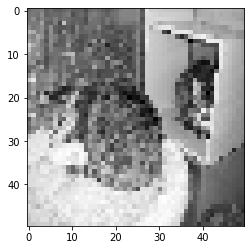

In [19]:
training_data[7][1]

array([1., 0.])

In [ ]:
torch.cuda.is_available()

In [23]:
device = torch.device("cuda:0")
device

In [46]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

Check how many cuda devices are avaliable, because if more than 1, we can write the logic to use as many as we have gpu

In [48]:
torch.cuda.device_count()

22452
2494


In [49]:
net = Net().to(device)

100%|██████████| 225/225 [01:15<00:00,  2.98it/s]

tensor(0.2647, grad_fn=<MseLossBackward>)


In [50]:

BATCH_SIZE = 100

EPOCHS = 10

def train(net):
  # we need to define afain the loss_function here for the device
  optimizer = optim.Adam(net.parameters(), lr = 0.001)
  loss_function = nn.MSELoss()
  for epoch in range(EPOCHS):
      for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
  #         print(i, i + BATCH_SIZE)
          # and send to the device only batch of images (NOT ALL!!!)
          batch_X = train_X[i : i + BATCH_SIZE].view(-1, 1, 50, 50).to(device)
          batch_y = train_y[i : i + BATCH_SIZE].to(device)

          net.zero_grad()
          outputs = net(batch_X)
          loss = loss_function(outputs, batch_y)
          loss.backward()
          optimizer.step()
      print(f"Epoch: {epoch}, loss: {loss}")

# the problem is here that we can hold all of the data on gpu (and it could be
# cool), but at the same time we could take a lot memory space on gpu, so out
# network will work with less efficiency. So here is a trade-off between number
# of images in batches and sending the data to the gpu partially. There is no
# right answer, every time the trade-off and time for each action will be
# different
train(net)

100%|██████████| 2494/2494 [00:03<00:00, 629.92it/s]

Accuracy:  0.619


In [ ]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            # we need to send all real classes to the device
            real_class = torch.argmax(test_y[i]).to(device)
            # and also put test_X on the device
            net_out = net(test_X[i].view(-1,1,50,50).to(device))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy: ", round(correct / total, 3))


test(net)

# Implementation of testing the accuracy during training

In [ ]:
import numpy as np

def frw_pass(X, y, train=False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs, y)]
    acc = matches.count(True) / len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()
    return acc, loss

def test(size = 32):
    random_start = np.random.randint(len(test_X) - size)
    X, y = test_X[random_start : random_start + size], test_y[random_start : random_start + size]

    with torch.no_grad():
        val_acc, val_loss = frw_pass(X.view(-1, 1, 50, 50).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = test(size=32)

print (val_acc, val_loss)




# Impletantion of tensor board

In [ ]:
import time

MODEL_NAME = f"model - {int(time.time())}"
net = Net().to(device)
# again define the optimizer
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 200
    EPOCHS = 30

    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i : i + BATCH_SIZE].view(-1, 1, 50, 50).to(device)
                batch_y = train_y[i : i + BATCH_SIZE].to(device)

                # train our model here
                acc, loss = frw_pass(batch_X, batch_y, train=True)

                if i % 50 == 0:
                    val_acc, val_loss = test(size = 100)
                    f.write(f"{MODEL_NAME}, {round(time.time(), 3)}, {round(float(acc), 2)},{round(float(loss), 4)}, {round(float(val_acc), 2)}, {round(float(val_loss), 4)}\n" )


train()

In [ ]:
print(EPOCHS)
